In [83]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score

In [84]:
data = pd.read_csv(r"/Users/lamawat/Downloads/tweetsLabels (1).csv")

In [86]:
data

,index,Text,Likes,Type,Label
0,0,جبت لكم خبر مُذهل رائع وجمييييل ايهيرب مسويين ...,0,1,1
1,1,جدةالأن ايهيرب مسوين خصومات جبااارة حتى 60 لحق...,0,1,1
2,2,زودتهايافاجر ايهيرب مسوين خصومات جبااارة حتى 6...,1,1,1
3,3,مقاطعهفلاورد ايهيرب مسوين خصومات جداااا جميلة ...,0,1,1
4,4,اذا بدت خصومات ايهيرب علموني احب الخصومات,0,1,1
...,...,...,...,...,...
74,75,غسول الجسم الأفريقي أفضل صابون ينظف وينعم وريح...,2,3,1
75,76,كريم للتخلص من خطوط التمدد ،يحتاج الاستمرارية ...,1,3,1
76,77,مرطبات الشفايف ترطب وتنعم حيل وروائحها منعشة و...,0,3,1
77,78,ڤيتامين C مكمل غذائي مناسب للبالغين والأطفال ف...,0,3,1


In [87]:
#Splitting our data into features and targer
feature_cols = ["Likes","Type"]
x = data[feature_cols] #fetures
y = data.Label #target

In [88]:
#Create train and test sets
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [89]:
#Training the Naive Bayes model on the Training set
clf = GaussianNB() 
clf.fit(x_train, y_train)

GaussianNB()

In [90]:
#Evalute the model, Predicting the Test set results
y_pred = clf.predict(x_test) 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.95      0.90      0.92        20

    accuracy                           0.88        24
   macro avg       0.77      0.82      0.79        24
weighted avg       0.89      0.88      0.88        24



In [91]:
#accuracy of the model
print('Model accuracy score: %{0:0.4f}'.format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: %87.5000


In [92]:
#precision 
print('precision: {0:0.4f}'.format(precision_score(y_test, y_pred)))

precision: 0.9474


In [93]:
#recall
print('recall: {0:0.4f}'.format(recall_score(y_test, y_pred)))

recall: 0.9000


In [94]:
#f1
print('f1: {0:0.4f}'.format(f1_score(y_test, y_pred)))

f1: 0.9231


In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 3  1]
 [ 2 18]]

True Positives(TP) =  3

True Negatives(TN) =  18

False Positives(FP) =  1

False Negatives(FN) =  2


<AxesSubplot:>

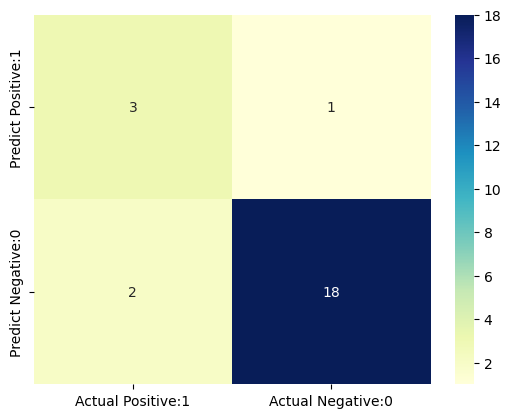

In [96]:
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')